## 1. Importing Libraries

In [2101]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## 2, Understanding Data

In [2102]:
#Reading csv file using pandas
bikeSharing_df = pd.read_csv('day.csv')
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2103]:
# Inspect shape of data
bikeSharing_df.shape

(730, 16)

In [2104]:
#check data for null and datatype 
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### There is no null value in the given data set  

In [2105]:
#check numerical data

bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [2106]:
#check the columns 
bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [2107]:
#check the size of data
bikeSharing_df.size

11680

## 3. Cleaning Data 

#### Dropping below columns as they are not required for analysis

* **instant** is just a row instance identifier.
* **dteday** is removed as we have mnth, year and weekday already in other columns.
* **casual and registered** variables are not available at the time of prediction

In [2108]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [2109]:
# Check new column
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [2110]:
# Droping instant column
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa
bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

In [2111]:
#Inspect after dropping
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


### Handle Outliers

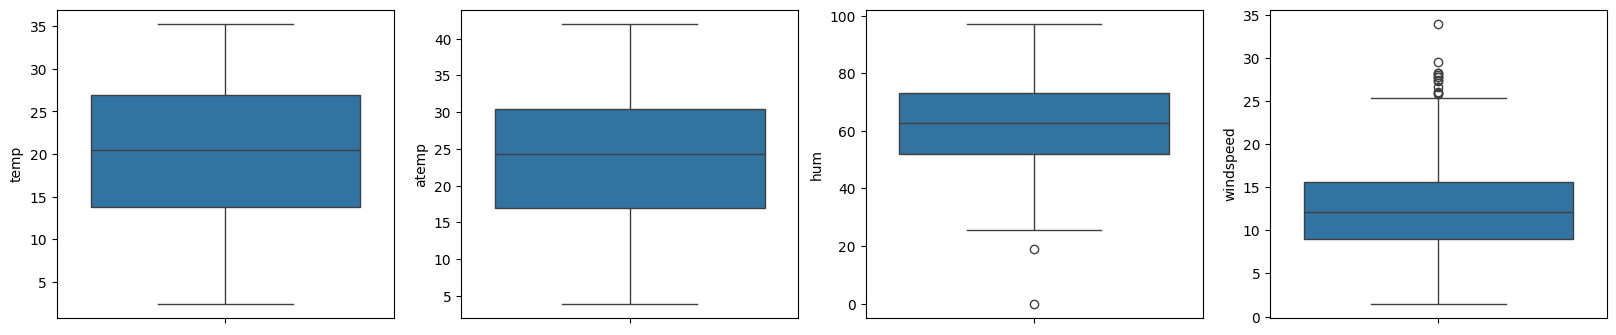

In [2112]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

#### From above plots, its clear there are no outliers to be handled

## 4. EDA

#### Pair Plots to check the linear relationship

<Figure size 1500x1500 with 0 Axes>

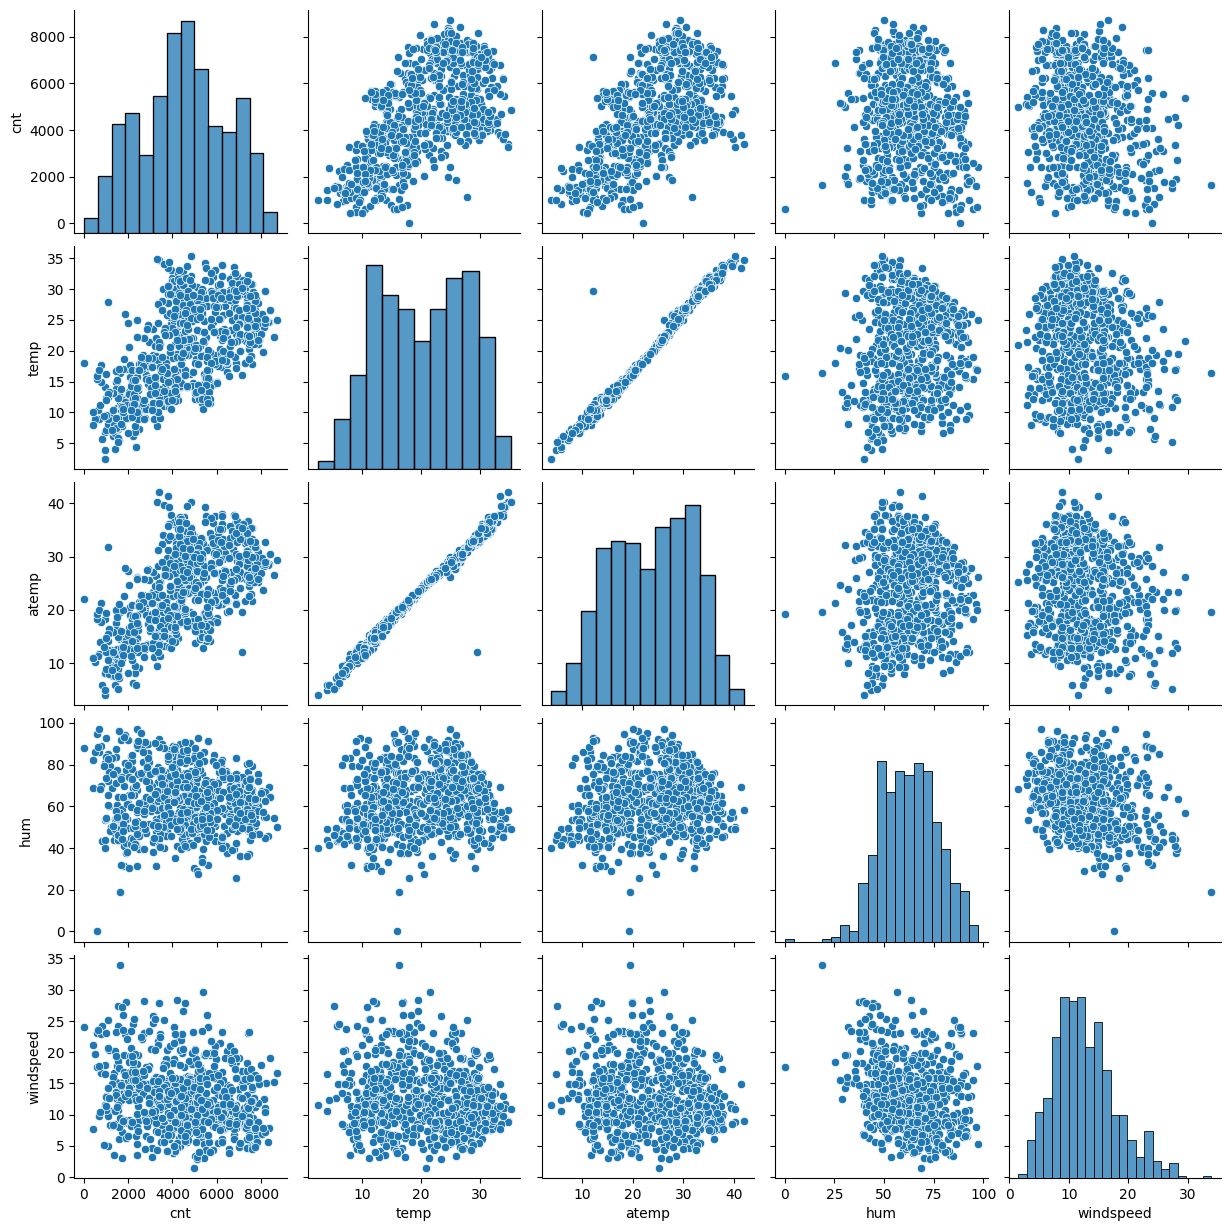

In [2113]:
# Pair plot for continuous variables
plt.figure(figsize = (15,15))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

* **atemp and temp** has strong correlation
* looks like atemp and temp has correlation with target variable **cnt**

#### Checking continuous variables relationship with each other

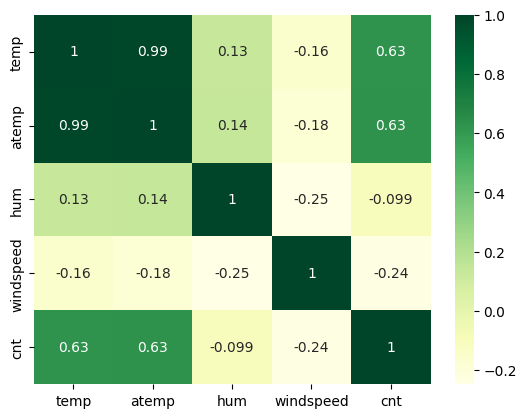

In [2114]:
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='YlGn', annot = True)
plt.show()

* atemp seems to be derived from temp so atemp field can be dropped

#### Heatmap of correlation between variables

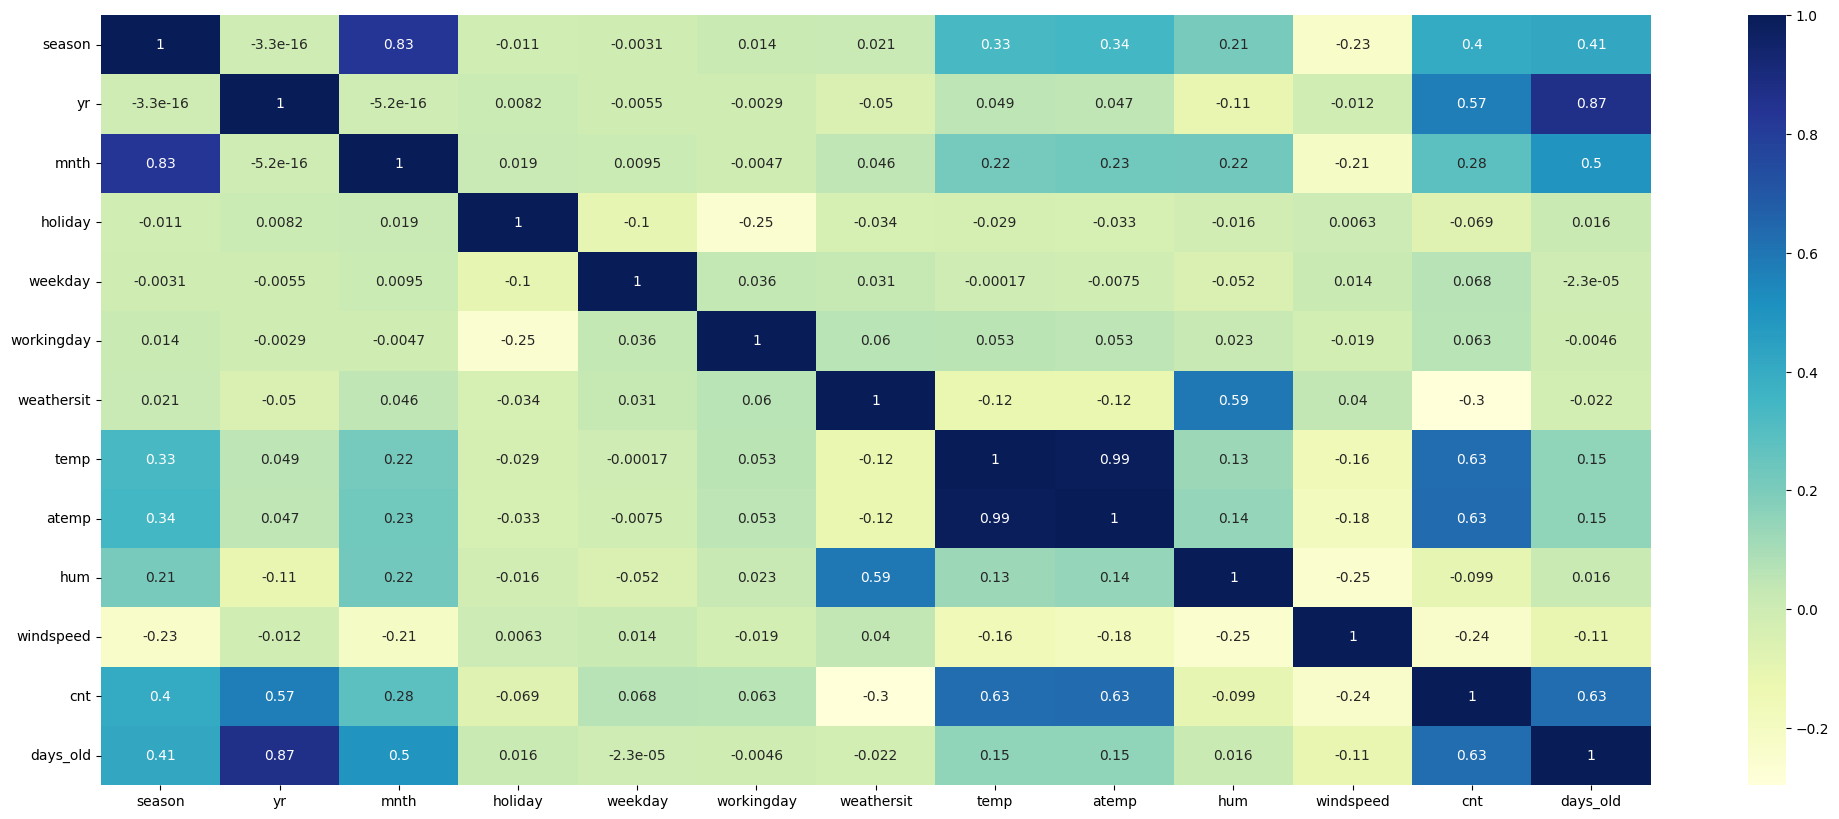

In [2115]:
#Calculate Correlation
corr = bikeSharing_df.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()


Based on the correlation map, the variables temp, atemp, and days_old appear to be highly correlated, suggesting that only one of these variables should be included in the model. We will decide which one to eliminate based on the Variance Inflation Factor (VIF) during the model-building process. Additionally, the target variable shows a linear relationship with some of the independent variables, which is a positive indication for developing a linear regression model.

 #### Analysing Categorical Variabels with target variables

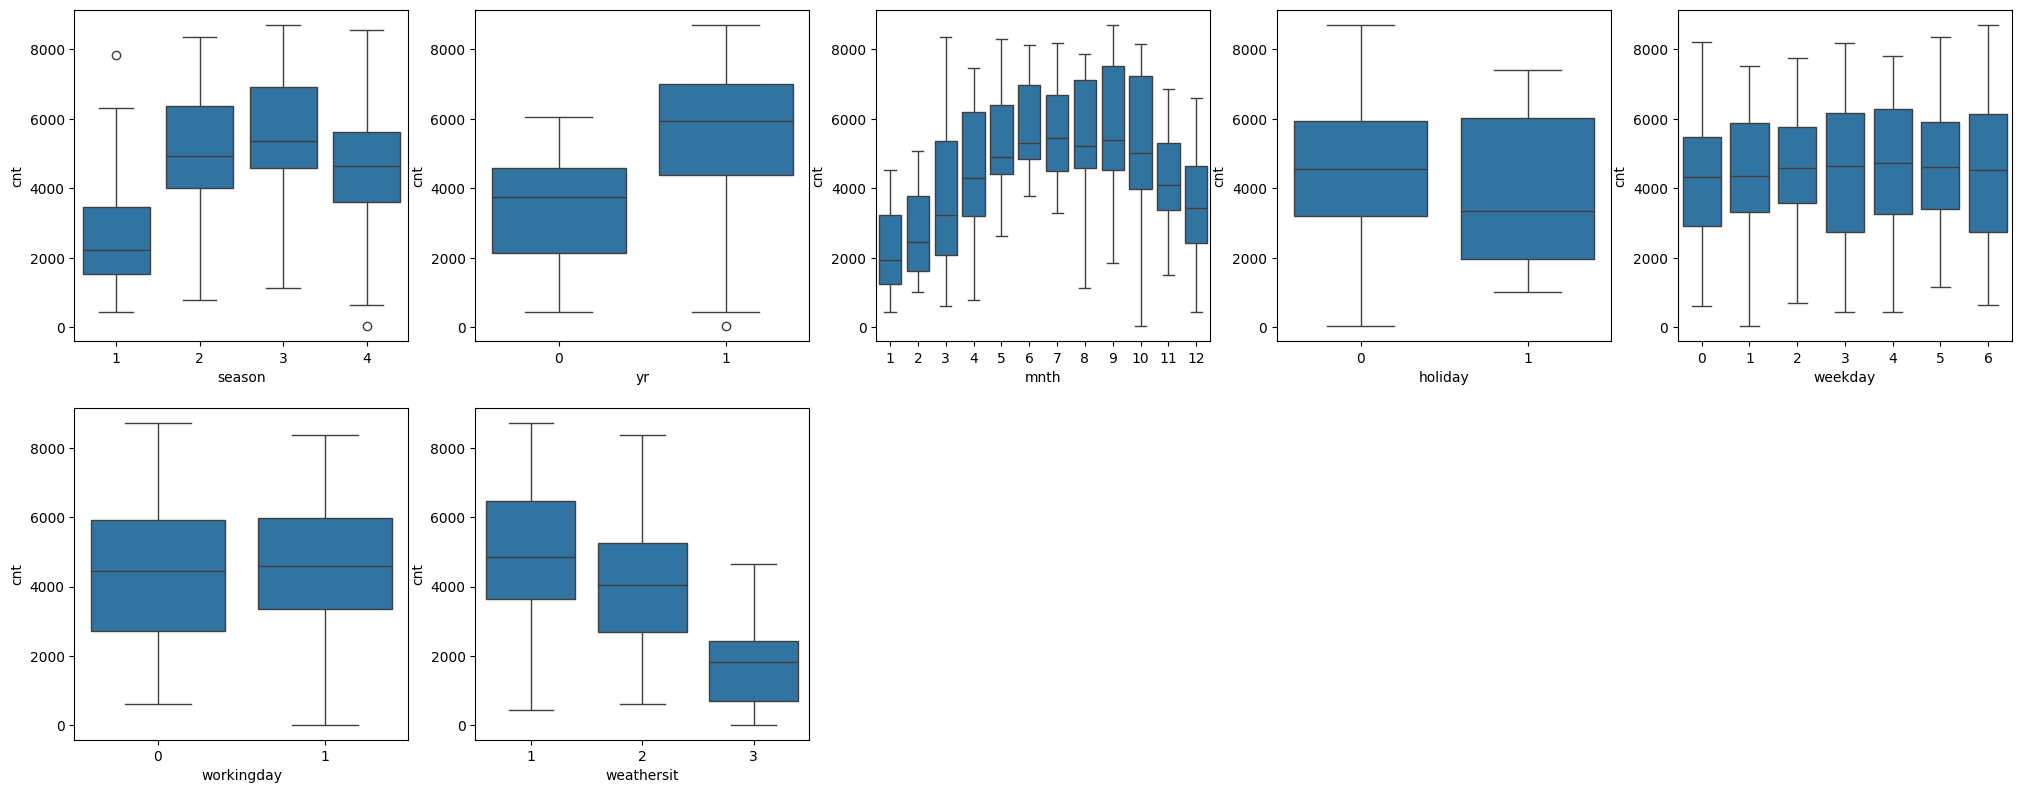

In [2116]:
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(25, 25))
for i in enumerate(vars_cat):
    plt.subplot(5,5,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()

**Inference:**

Several insights can be drawn from the plots:

1. **Season:** Fall (Season 3) has the highest demand for rental bikes.
2. **Yearly Growth:** There is noticeable growth in demand for rental bikes compared to the previous year.
3. **Monthly Trend:** Demand increases steadily each month until June, peaking in September. After September, the demand starts to decline.
4. **Holidays:** Demand tends to decrease on holidays.
5. **Weekdays:** Weekday data does not provide a clear pattern of demand.
6. **Weather:** Clear weather conditions have the highest demand for bike rentals.
7. **Seasonal Variation:** Bike-sharing is most popular in September, while demand is lower at the end and beginning of the year, likely due to extreme weather conditions.

#### Scattered plot to find the correlation trend

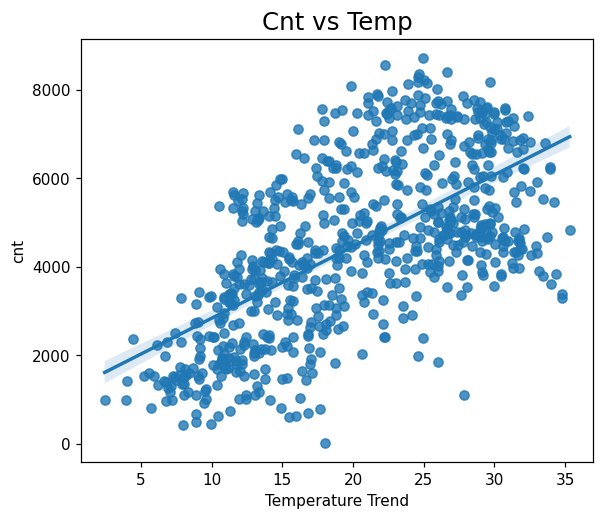

In [2117]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.xlabel("Temperature Trend")
plt.show()

Bike demand is positively correlated with temperature. The variable cnt shows a linear increase with temperature, indicating a linear relationship between them.

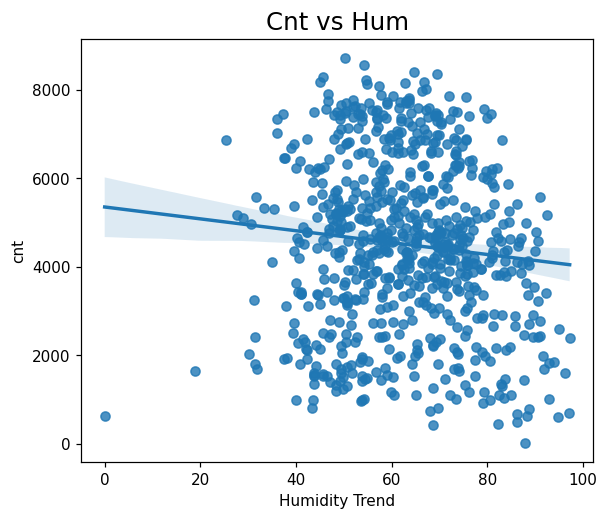

In [2118]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="hum")
plt.xlabel("Humidity Trend")
plt.show()

Humidity values are more scattered, but there is a general trend of cnt (bike demand) decreasing as humidity increases.

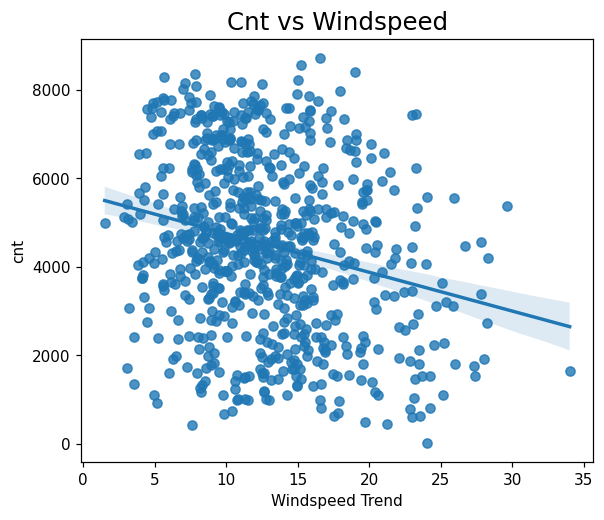

In [2119]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.xlabel("Windspeed Trend")
plt.show()

Windspeed values are quite scattered, but there is an observable trend of `cnt` (bike demand) decreasing as windspeed increases.

# 5. Data Preparation for Linear Regression 

In [2120]:
# Convert Numerical coulmns to categorical columns

bikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharing_df.mnth = bikeSharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


#### Create dummy variables for all categorical variables

In [2121]:
# Dropping the first columns as (p-1) dummies can explain p categories.
# In weathersit first column was not dropped so as to not lose the info about severe weather situation.

bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday"], drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weathersit"])
bikeSharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

# 6. Model Building

#### Split Data into training and test

In [2122]:
columns_to_convert = ['season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']

# Convert True/False to 1/0 for the specified columns
bikeSharing_df[columns_to_convert] = bikeSharing_df[columns_to_convert].astype(int)
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,1,0


In [2123]:
#y contains only target variable
y=bikeSharing_df.pop('cnt')

#X is all remaining variable
X=bikeSharing_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


In [2124]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


#### Feature Scaling continuous variables

In [2125]:
# To ensure all features are on the same scale for easier interpretation, the continuous columns will be scaled

# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2126]:
# scaling continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


####   Build a Model using RFE and Automated approach
Use RFE to eliminate some columns

In [2127]:
# Build a Linear Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train, y_train)

# Cut down number of features to 15 using automated approach
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.False_, np.int64(2)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('days_old', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.False_, np.int64(15)),
 ('season_winter', np.False_, np.int64(3)),
 ('mnth_aug', np.False_, np.int64(8)),
 ('mnth_dec', np.False_, np.int64(6)),
 ('mnth_feb', np.False_, np.int64(12)),
 ('mnth_jan', np.False_, np.int64(10)),
 ('mnth_jul', np.False_, np.int64(14)),
 ('mnth_jun', np.False_, np.int64(9)),
 ('mnth_mar', np.False_, np.int64(4)),
 ('mnth_may', np.False_, np.int64(5)),
 ('mnth_nov', np.False_, np.int64(7)),
 ('mnth_oct', np.True_, np.int64(1)),
 ('mnth_sept', np.True_, np.int64(1)),
 ('weekday_mon', np.False_, np.int64(13)),
 ('weekday_sat', np.True_, np.int64(1)),
 ('weekday_sun', np.True_, np.int64(1)),
 ('weekday_thu', np.Fal

#### Manual elimination

Building model using statsmodel api

In [2128]:
# Function to build model

def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [2129]:
# Function to calculate VIFs

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [2130]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['temp', 'season_summer', 'season_winter', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [2131]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

X_train_rfe.shape

(511, 15)

In [2132]:
#Create Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          4.52e-183
Time:                        19:19:32   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

Dropping variables with negative coef hum, holiday, mnth_jan, mnth_jul, temp, 

In [2133]:
#Create Model 2 - Dropping Negative coef variables and with high p-value
cols = ['yr', 'workingday','temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.57e-182
Time:                        19:19:32   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

**Inference**

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.828
Let us select Model 2 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [2134]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [2135]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'workingday','temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1392.147634256537 [ 1997.33683654   418.6348448   3931.34617764  -769.13660418
  -745.77587948   490.9602611    811.43981815   725.11549979
   466.183871   -2232.96182786  -674.15034578]


# Model Evaluation

In [2136]:
y_train_pred = lr.predict(X_train[cols])

#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

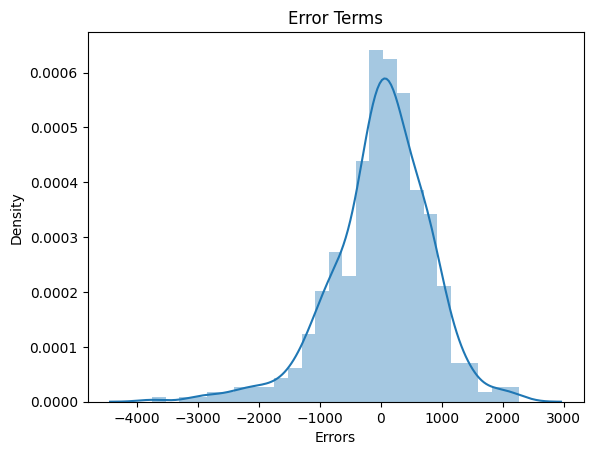

In [2137]:
plot_res_dist(y_train, y_train_pred)

Errors are normally distribured here with mean 0. So everything seems to be fine

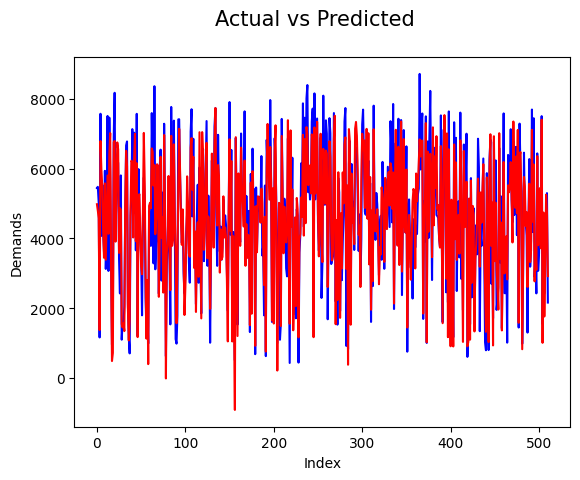

In [2138]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [2139]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8276665291536334

#### Linearity Check

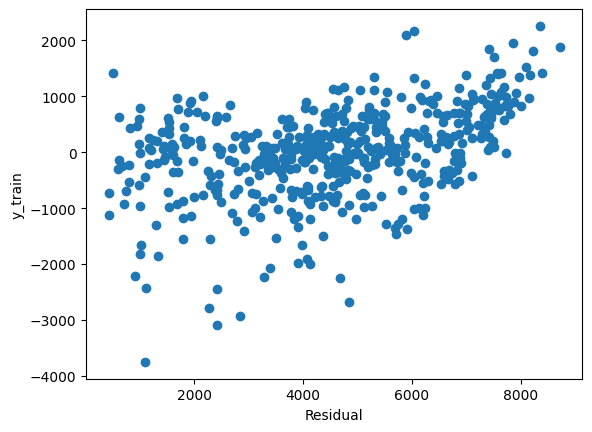

In [2140]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Predict values for test data set

In [2141]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

#Columns from our final model
cols = ['yr', 'workingday','temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

#### R-Squared value for test predictions

In [2142]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8277694033216871

#### Plot Test vs Predicted test values

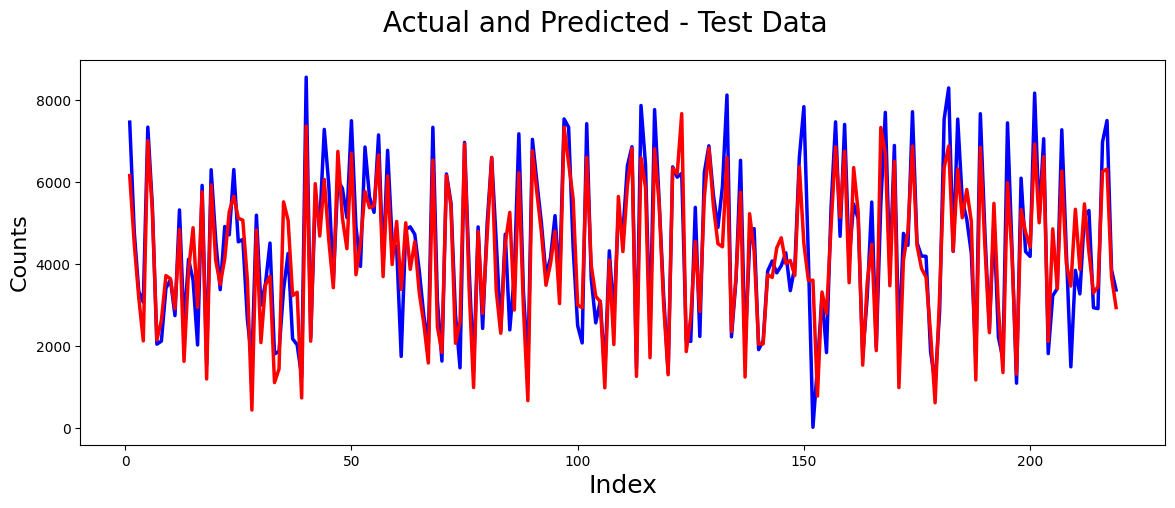

In [2143]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

    #Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

# Intrepretting the Model

In [2144]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols =  ['yr', 'workingday','temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.57e-182
Time:                        19:19:33   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

Based on the analysis of the model, the company should concentrate on the following features:

1. **User Growth Expectation:** Previous data suggests a significant increase in the number of users is anticipated once the situation normalizes, compared to 2019.
2. **Maintenance Opportunities:** Bookings are likely to decrease during light snow or rain, which could be an opportune time to service the bikes without negatively impacting business.

To capitalize on these insights, when conditions return to normal, the company should introduce new offers in spring, taking advantage of pleasant weather, and consider advertising in September, as this period is expected to yield the best business results.

# Conclusion


Variables to predict the demand for shared bikes

**holiday,
temp,
hum,
windspeed,
Season,
months(January, July, September, November, December),
Year (2019),
Sunday,
weathersit( Light Snow, Mist + Cloudy)**